In [1]:
# https://www.sciencebysimulation.com/gassim/Simulator.aspx

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Loading in 1-Butene (C4H8) Data

In [12]:
file_path = 'Butene_0.65L_1mol.csv'
data = pd.read_csv(file_path)

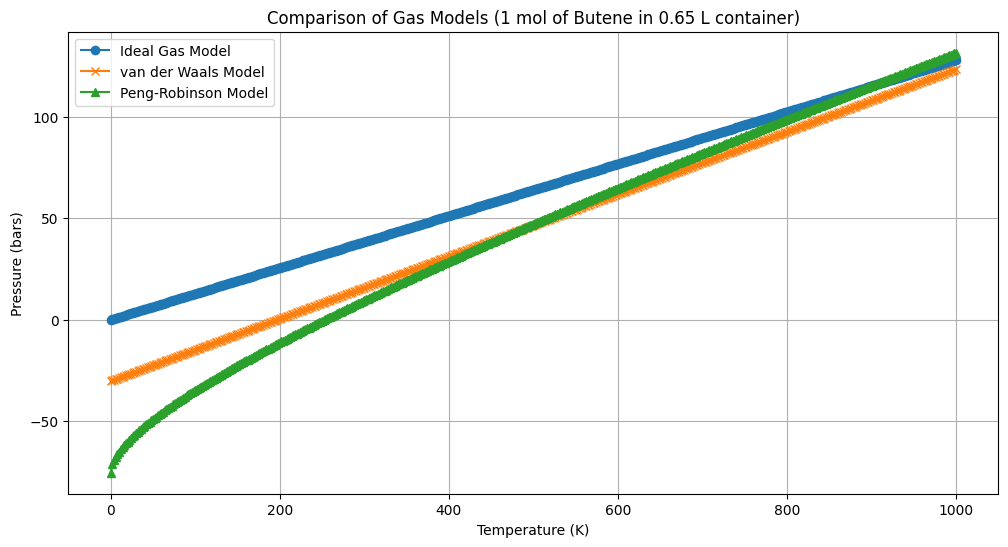

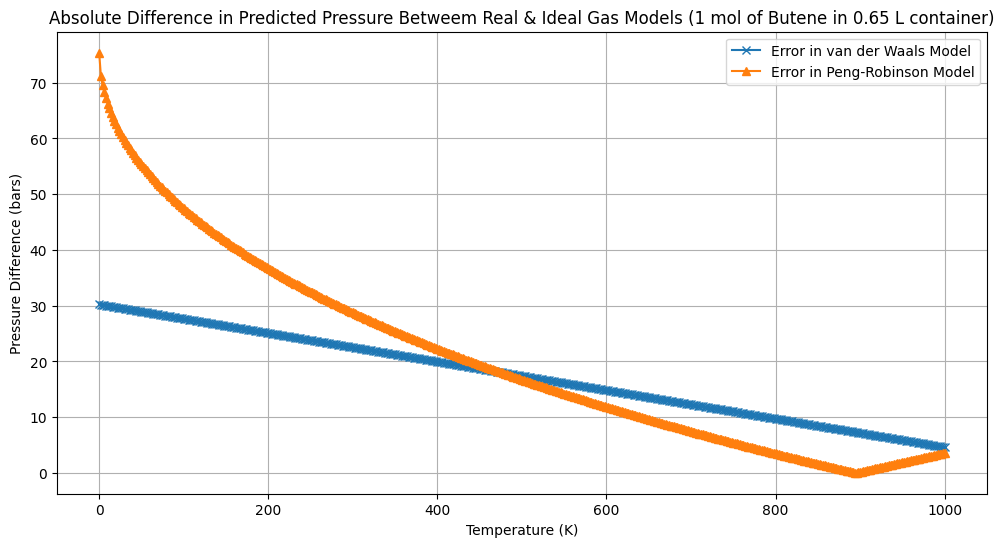

In [13]:
# Error calculation: Difference between real gas models and ideal gas model
data['vdW_Error'] = abs(data['Pressure_Ideal-Gas-Model-bars'] - data['Pressure_van-der-Waals-Real-Gas-Model_bars'])
data['PR_Error'] = abs(data['Pressure_Ideal-Gas-Model-bars'] - data['Pressure-Peng-Robinson-Real-Gas-Model-bars'])

# Pressure vs temperature for different models
plt.figure(figsize=(12, 6))
plt.plot(data['Temperature_K'], data['Pressure_Ideal-Gas-Model-bars'], label='Ideal Gas Model', marker='o')
plt.plot(data['Temperature_K'], data['Pressure_van-der-Waals-Real-Gas-Model_bars'], label='van der Waals Model', marker='x')
plt.plot(data['Temperature_K'], data['Pressure-Peng-Robinson-Real-Gas-Model-bars'], label='Peng-Robinson Model', marker='^')
plt.title('Comparison of Gas Models (1 mol of Butene in 0.65 L container)')
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (bars)')
plt.legend()
plt.grid(True)
plt.show()

# Visualization of error
plt.figure(figsize=(12, 6))
plt.plot(data['Temperature_K'], data['vdW_Error'], label='Error in van der Waals Model', marker='x')
plt.plot(data['Temperature_K'], data['PR_Error'], label='Error in Peng-Robinson Model', marker='^')
plt.title('Absolute Difference in Predicted Pressure Betweem Real & Ideal Gas Models (1 mol of Butene in 0.65 L container)')
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure Difference (bars)')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Constants
R = 0.08314  # Gas constant in L bar / K mol
V = 0.65

# Calculate a term from the van der Waals equation rearranged for 'a':
# P = (RT/(V-b)) - a/(V^2), approximate b as zero for simplicity
b = 0.1084
data['P_vdW_a'] = data['Pressure_van-der-Waals-Real-Gas-Model_bars'] + (R * data['Temperature_K'] / (V - b))
data['1/V^2'] = 1 / V**2

# Independent variable (1/V^2) and dependent variable (P_vdW_a term which includes 'a')
X = data[['1/V^2']]
y = data['P_vdW_a']

model = LinearRegression()
model.fit(X, y)

# Coefficient 'a' is the slope in this linear regression
a_coefficient = model.coef_[0]
print(f"Estimated van der Waals coefficient 'a' for Butene: {a_coefficient:.4f} L^2 bar / mol^2")


Estimated van der Waals coefficient 'a' for Butene: 40.0303 L^2 bar / mol^2
